# Telecom Churn Case Study

In [5]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', 500)  #To display maximum 500 columns at a time
pd.set_option('display.max_rows', 500) #To display maximum 500 rows at a time

#Importing the data
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

# Exploratory Data Analysis

In [7]:
df.shape

(99999, 226)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


Looking at the info, we can see that we have 12 object columns. These 12 columns are the columns in which dates are given.

In [9]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

##### Checking for null values in the data.

In [10]:
round(100*df.isnull().sum()/df.shape[0], 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [11]:
#In the column date_of_last_rech_data_6, the null values indicate that there was
#no recharge done. Therefore converting the date_of_last_rech_data_6 column to 1
#or 0 where all null values will take value 0 and non null will take value 1
#This will indicate whether a recharge was done in that month.
df['rech_data_done_6'] = np.where(df['date_of_last_rech_data_6'].isnull(), 0, 1)
df['rech_data_done_7'] = np.where(df['date_of_last_rech_data_7'].isnull(), 0, 1)
df['rech_data_done_8'] = np.where(df['date_of_last_rech_data_8'].isnull(), 0, 1)
df['rech_data_done_9'] = np.where(df['date_of_last_rech_data_9'].isnull(), 0, 1)

df['rech_voice_done_6'] = np.where(df['date_of_last_rech_6'].isnull(), 0, 1)
df['rech_voice_done_7'] = np.where(df['date_of_last_rech_7'].isnull(), 0, 1)
df['rech_voice_done_8'] = np.where(df['date_of_last_rech_8'].isnull(), 0, 1)
df['rech_voice_done_9'] = np.where(df['date_of_last_rech_9'].isnull(), 0, 1)

drop_col = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
            'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',
            'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8']
df.drop(columns=drop_col, inplace=True)

In [12]:
#total_rech_data_ columns have null values which indicate that no recharge was done.
#Therefore we will replace the null values with 0
df['total_rech_data_6'] = df['total_rech_data_6'].fillna(0)
df['total_rech_data_7'] = df['total_rech_data_7'].fillna(0)
df['total_rech_data_8'] = df['total_rech_data_8'].fillna(0)
df['total_rech_data_9'] = df['total_rech_data_9'].fillna(0)

#Similar to total_rech_data, we will replace null values in max_rech_data_ with 0
df['max_rech_data_6'] = df['max_rech_data_6'].fillna(0)
df['max_rech_data_7'] = df['max_rech_data_7'].fillna(0)
df['max_rech_data_8'] = df['max_rech_data_8'].fillna(0)
df['max_rech_data_9'] = df['max_rech_data_9'].fillna(0)

#Similar to total_rech_data, we will replace null values in av_rech_amt_data_ with 0
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(0)
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].fillna(0)
df['av_rech_amt_data_9'] = df['av_rech_amt_data_9'].fillna(0)

In [13]:
#Calculating the average recharge amount of the 6th and 7th month and storing it in a new column 'Avg_rech_amt_6_7'
df['total_data_rech_amt_6'] = df['total_rech_num_6'] * df['av_rech_amt_data_6']
df['total_data_rech_amt_7'] = df['total_rech_num_7'] * df['av_rech_amt_data_7']

df['total_rech_amt_6'] = df['total_rech_amt_6'] + df['total_data_rech_amt_6']
df['total_rech_amt_7'] = df['total_rech_amt_7'] + df['total_data_rech_amt_7']

df['Avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2
print(df['Avg_rech_amt_6_7'].quantile(0.7))
#Selecting only those customers which are above 70th percentile of 'Avg_rech_amt_6_7' column.
df = df.loc[df['Avg_rech_amt_6_7'] > df['Avg_rech_amt_6_7'].quantile(0.7)]
print("Shape:",df.shape)

639.0
Shape: (29993, 226)


In [14]:
#Creating the target column 'churn'.
df['churn'] = np.where(((df['total_ic_mou_9'] == 0) &
                        (df['total_og_mou_9'] == 0) &
                        (df['vol_2g_mb_9'] == 0) &
                        (df['vol_3g_mb_9'] == 0)), 1, 0)

In [15]:
#storing the column names ending with 9 in drop_col
drop_col = [name for name in df.columns if name[-1] == '9']
#adding sep_vbc_3g to drop_col
drop_col.append('sep_vbc_3g')
df.drop(columns=drop_col, inplace=True)

In [16]:
#Some columns have only 1 value in them. We will drop those columns from our dataframe
col_with_only_one_value = ['circle_id','loc_og_t2o_mou', 'std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
                           'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']
df.drop(columns=col_with_only_one_value, inplace=True)

In [17]:
round(100*df.isnull().sum()/df.shape[0], 2)

mobile_number             0.00
arpu_6                    0.00
arpu_7                    0.00
arpu_8                    0.00
onnet_mou_6               2.12
onnet_mou_7               2.05
onnet_mou_8               4.21
offnet_mou_6              2.12
offnet_mou_7              2.05
offnet_mou_8              4.21
roam_ic_mou_6             2.12
roam_ic_mou_7             2.05
roam_ic_mou_8             4.21
roam_og_mou_6             2.12
roam_og_mou_7             2.05
roam_og_mou_8             4.21
loc_og_t2t_mou_6          2.12
loc_og_t2t_mou_7          2.05
loc_og_t2t_mou_8          4.21
loc_og_t2m_mou_6          2.12
loc_og_t2m_mou_7          2.05
loc_og_t2m_mou_8          4.21
loc_og_t2f_mou_6          2.12
loc_og_t2f_mou_7          2.05
loc_og_t2f_mou_8          4.21
loc_og_t2c_mou_6          2.12
loc_og_t2c_mou_7          2.05
loc_og_t2c_mou_8          4.21
loc_og_mou_6              2.12
loc_og_mou_7              2.05
loc_og_mou_8              4.21
std_og_t2t_mou_6          2.12
std_og_t

A few columns still have more than 30% null values. We can remove these columns

In [18]:
df = df.iloc[:, list((100 * df.isnull().sum() / df.shape[0])<30)]

In [19]:
df['churn'].value_counts()

0    27581
1     2412
Name: churn, dtype: int64

There are many columns with around 1%-2% null values. Lets try and remove them and check how many rows we are still left with.

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [21]:
mobile_df = df.pop('mobile_number') #Saving mobile numbers in a seperate variable to be used later to uniquely identify customers.

In [22]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_data_done_6,rech_data_done_7,rech_data_done_8,rech_voice_done_6,rech_voice_done_7,rech_voice_done_8,total_data_rech_amt_6,total_data_rech_amt_7,Avg_rech_amt_6_7,churn
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,1370.0,1008.0,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1,1,1,1,1,1,1008.0,756.0,1189.0,1
1,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.23,4.58,0.13,0.0,0.00,0.00,4.68,23.43,12.76,0.0,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.00,0.00,0.00,0.00,4,9,11,74.0,1770.0,283,44,154,65,44,23,30,0.0,1.0,2.0,0.0,154.0,25.0,0.0,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,0,1,0,0,0,2,0,0,0,0,0,0,1006,0.00,0.00,0.00,0,1,1,1,1,1,0.0,1386.0,922.0,0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580.0,790.0,3638,1580

In [25]:
df_col = df.columns
df_clean = pd.DataFrame(IterativeImputer().fit_transform(df))
df_clean.columns = df_col
df_clean.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_data_done_6,rech_data_done_7,rech_data_done_8,rech_voice_done_6,rech_voice_done_7,rech_voice_done_8,total_data_rech_amt_6,total_data_rech_amt_7,Avg_rech_amt_6_7,churn
0,197.385,214.816,213.803,228.278972,224.903069,0.00,334.113447,346.598883,0.00,39.020031,20.638392,0.00,46.040024,51.87467,0.00,75.935783,75.451139,0.00,149.400775,148.131572,0.00,8.881871,14.004482,0.00,34.939669,40.247586,0.00,234.218945,237.671998,0.00,139.930301,146.818074,0.00,150.205431,162.135526,0.00,3.113413,6.298115,0.00,293.24554,315.257051,0.00,2.060873,-8.843331,0.00,5.701109,5.718507,0.00,-535.194143,-549.822105,0.0,0.00,0.00,0.00,69.158787,54.289545,0.16,128.489616,146.645391,4.13,18.066785,23.263307,1.15,215.738782,224.252055,5.44,-2.164348,26.236914,0.00,27.555809,17.737337,0.00,2.187211,2.266892,0.00,27.593541,46.275862,0.00,0.00,0.00,5.44,9.941662,16.999515,0.0,-0.380727,-5.495333,0.00,-252.851953,-281.742091,0.00,4.0,3.0,2.0,1370.0,1008.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,1.0,1.0,1.0,1.0,1.0,1.0,1008.0,756.0,1189.0,1.0
1,34.047,355.074,268.321,24.110000,78.680000,7.68,15.740000,99.840000,304.76,0.000000,0.000000,0.00,0.000000,0.00000,0.00,23.880000,74.560000,7.68,11.510000,75.940000,291.86,0.000000,0.000000,0.00,0.000000,2.910000,0.00,35.390000,150.510000,299.54,0.230000,4.110000,0.00,0.000000,0.460000,0.13,0.000000,0.000000,0.00,0.23000,4.580000,0.13,0.000000,0.000000,0.00,4.680000,23.430000,12.76,0.000000,0.000000,0.0,40.31,178.53,312.44,1.610000,29.910000,29.23,17.480000,65.380000,375.58,0.000000,8.930000,3.61,19.090000,104.230000,408.43,0.000000,0.000000,2.35,5.900000,0.000000,12.49,0.000000,0.000000,0.00,5.900000,0.000000,14.84,26.83,104.23,423.28,0.000000,0.000000,0.0,1.830000,0.000000,0.00,0.000000,0.000000,0.00,4.0,9.0,11.0,74.0,1770.0,283.0,44.0,154.0,65.0,44.0,23.0,30.0,0.0,1.0,2.0,0.0,154.0,25.0,0.0,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,

In [26]:
# Percentage of missing values
round(100*(df_clean.isnull().sum()/df_clean.shape[0]),2)

arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2t_mou_8         0.0
std_og_t2m_mou_6         0.0
std_og_t2m_mou

# Blah B;ah Blah

In [28]:
df = df_clean

In [29]:
round(100*df.isnull().sum()/df.shape[0], 2)

arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2t_mou_8         0.0
std_og_t2m_mou_6         0.0
std_og_t2m_mou

In [30]:
df.shape

(29993, 143)

In [31]:
df['churn'].value_counts()

0.0    27581
1.0     2412
Name: churn, dtype: int64

Okay. So we are still left with 28k rows. That will not be a problem.

In [32]:
df = df.reset_index(drop=True)
round(100*df.isnull().sum()/df.shape[0],2)

arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
onnet_mou_6              0.0
onnet_mou_7              0.0
onnet_mou_8              0.0
offnet_mou_6             0.0
offnet_mou_7             0.0
offnet_mou_8             0.0
roam_ic_mou_6            0.0
roam_ic_mou_7            0.0
roam_ic_mou_8            0.0
roam_og_mou_6            0.0
roam_og_mou_7            0.0
roam_og_mou_8            0.0
loc_og_t2t_mou_6         0.0
loc_og_t2t_mou_7         0.0
loc_og_t2t_mou_8         0.0
loc_og_t2m_mou_6         0.0
loc_og_t2m_mou_7         0.0
loc_og_t2m_mou_8         0.0
loc_og_t2f_mou_6         0.0
loc_og_t2f_mou_7         0.0
loc_og_t2f_mou_8         0.0
loc_og_t2c_mou_6         0.0
loc_og_t2c_mou_7         0.0
loc_og_t2c_mou_8         0.0
loc_og_mou_6             0.0
loc_og_mou_7             0.0
loc_og_mou_8             0.0
std_og_t2t_mou_6         0.0
std_og_t2t_mou_7         0.0
std_og_t2t_mou_8         0.0
std_og_t2m_mou_6         0.0
std_og_t2m_mou

In [33]:
import warnings #To ignore warnings
warnings.filterwarnings('ignore')

In [34]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_data_done_6,rech_data_done_7,rech_data_done_8,rech_voice_done_6,rech_voice_done_7,rech_voice_done_8,total_data_rech_amt_6,total_data_rech_amt_7,Avg_rech_amt_6_7,churn
0,197.385,214.816,213.803,228.278972,224.903069,0.00,334.113447,346.598883,0.00,39.020031,20.638392,0.00,46.040024,51.87467,0.00,75.935783,75.451139,0.00,149.400775,148.131572,0.00,8.881871,14.004482,0.00,34.939669,40.247586,0.00,234.218945,237.671998,0.00,139.930301,146.818074,0.00,150.205431,162.135526,0.00,3.113413,6.298115,0.00,293.24554,315.257051,0.00,2.060873,-8.843331,0.00,5.701109,5.718507,0.00,-535.194143,-549.822105,0.0,0.00,0.00,0.00,69.158787,54.289545,0.16,128.489616,146.645391,4.13,18.066785,23.263307,1.15,215.738782,224.252055,5.44,-2.164348,26.236914,0.00,27.555809,17.737337,0.00,2.187211,2.266892,0.00,27.593541,46.275862,0.00,0.00,0.00,5.44,9.941662,16.999515,0.0,-0.380727,-5.495333,0.00,-252.851953,-281.742091,0.00,4.0,3.0,2.0,1370.0,1008.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,1.0,1.0,1.0,1.0,1.0,1.0,1008.0,756.0,1189.0,1.0
1,34.047,355.074,268.321,24.110000,78.680000,7.68,15.740000,99.840000,304.76,0.000000,0.000000,0.00,0.000000,0.00000,0.00,23.880000,74.560000,7.68,11.510000,75.940000,291.86,0.000000,0.000000,0.00,0.000000,2.910000,0.00,35.390000,150.510000,299.54,0.230000,4.110000,0.00,0.000000,0.460000,0.13,0.000000,0.000000,0.00,0.23000,4.580000,0.13,0.000000,0.000000,0.00,4.680000,23.430000,12.76,0.000000,0.000000,0.0,40.31,178.53,312.44,1.610000,29.910000,29.23,17.480000,65.380000,375.58,0.000000,8.930000,3.61,19.090000,104.230000,408.43,0.000000,0.000000,2.35,5.900000,0.000000,12.49,0.000000,0.000000,0.00,5.900000,0.000000,14.84,26.83,104.23,423.28,0.000000,0.000000,0.0,1.830000,0.000000,0.00,0.000000,0.000000,0.00,4.0,9.0,11.0,74.0,1770.0,283.0,44.0,154.0,65.0,44.0,23.0,30.0,0.0,1.0,2.0,0.0,154.0,25.0,0.0,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.0,

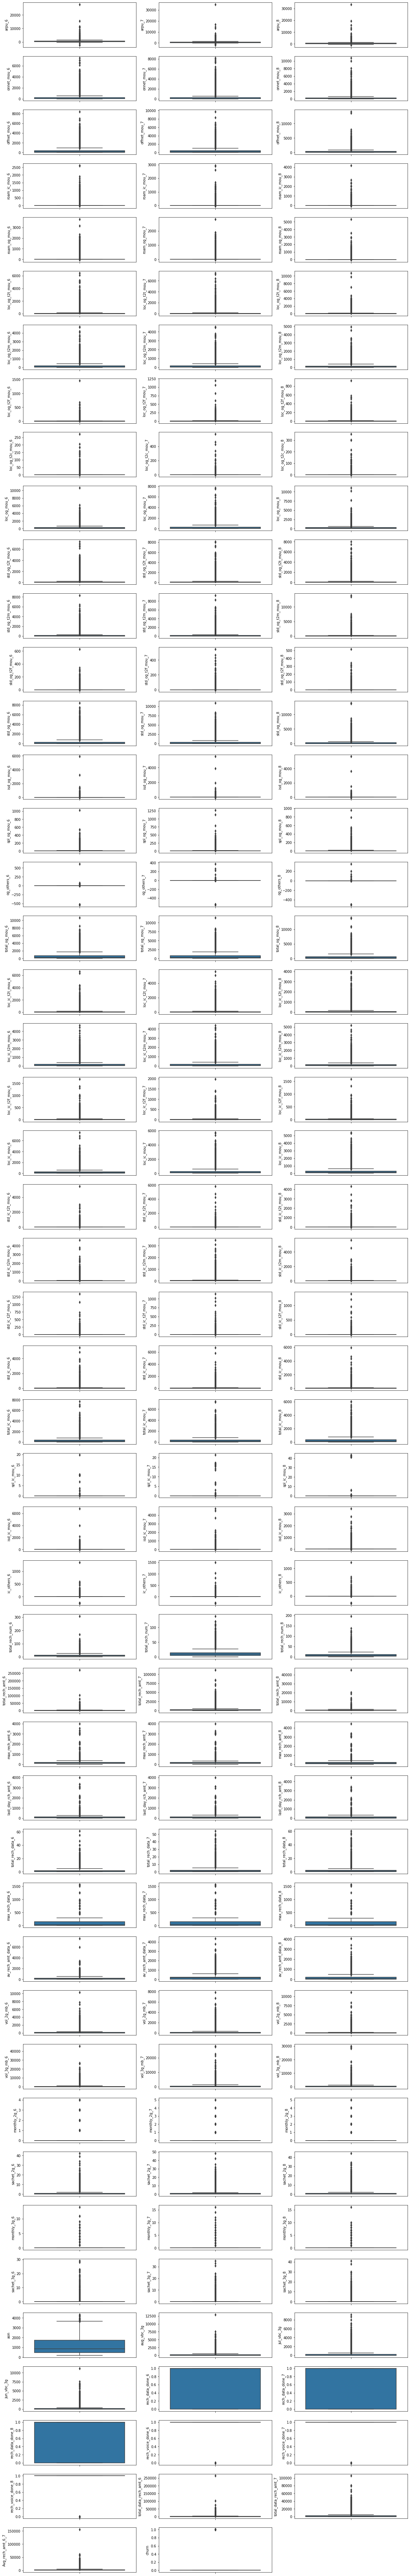

In [36]:
col = list(df.columns)
plt.figure(figsize=(20,140))
for i in range(1, len(col)+1):
  plt.subplot(49,3,i)
  sns.boxplot(y=df[col[i-1]])
plt.show()

In [37]:
y = df.pop('churn') # Saving our target variable in y
init_df = df.copy() #Keeping a copy of our initial df

In [38]:
#importing the StandardScaler library from the sklearn
from sklearn.preprocessing import StandardScaler

#instantiating the StandardScaler() class
standard_scaler = StandardScaler()

df = standard_scaler.fit_transform(df)

In [39]:
df.shape

(29993, 142)

In [40]:
#importing PCA library from sklearn
from sklearn.decomposition import PCA

In [41]:
#instantiating PCA class with random_state=100
pca = PCA(svd_solver='randomized', random_state=100)

#fitting our scaled data in PCA
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [42]:
#Taking a look at the new basis vectors
pca.components_

array([[ 1.44117546e-01,  1.50044267e-01,  1.41608327e-01, ...,
        -5.23377986e-02, -5.44341833e-02, -2.84577794e-02],
       [ 8.28911091e-02,  8.83449717e-02,  1.00627162e-01, ...,
         1.35110800e-01,  1.41942275e-01,  1.71234927e-01],
       [ 1.03418443e-01,  1.25338802e-01,  1.15302275e-01, ...,
         1.32365834e-01,  1.58891850e-01,  1.85228425e-01],
       ...,
       [-0.00000000e+00, -1.60659618e-16, -6.93840130e-17, ...,
        -4.48400476e-16, -7.32180960e-16, -3.02886790e-01],
       [ 0.00000000e+00, -3.12185335e-16, -2.34863946e-16, ...,
        -1.08400984e-15, -1.44426666e-15,  4.75735984e-01],
       [ 0.00000000e+00,  1.43889664e-16,  2.02849630e-16, ...,
         1.99816776e-15, -3.64157408e-16,  3.07093634e-01]])

In [43]:
#Checking the variance of each of the principle components
pca.explained_variance_ratio_

array([1.07672580e-01, 8.68731834e-02, 6.39520615e-02, 5.26239237e-02,
       4.33269102e-02, 3.97568557e-02, 3.17068926e-02, 2.72050701e-02,
       2.48564110e-02, 2.39796814e-02, 2.26278766e-02, 2.16557086e-02,
       2.02181230e-02, 1.84067274e-02, 1.66914537e-02, 1.62282820e-02,
       1.57666207e-02, 1.50050866e-02, 1.48808529e-02, 1.41408595e-02,
       1.35319777e-02, 1.28028933e-02, 1.25783145e-02, 1.17626577e-02,
       1.08336074e-02, 1.05628652e-02, 9.90973589e-03, 9.00309242e-03,
       8.29225356e-03, 7.99057345e-03, 7.42118363e-03, 7.40094334e-03,
       6.97282955e-03, 6.87273284e-03, 6.34930818e-03, 6.13353167e-03,
       6.04242286e-03, 5.85337821e-03, 5.73536226e-03, 5.54652273e-03,
       5.42610477e-03, 5.40976622e-03, 5.33389870e-03, 4.74125086e-03,
       4.67484309e-03, 4.63510316e-03, 4.47304364e-03, 4.42471997e-03,
       4.36744289e-03, 3.90738069e-03, 3.79334623e-03, 3.62878763e-03,
       3.47170499e-03, 3.43590060e-03, 3.37115170e-03, 3.25170463e-03,
      

<BarContainer object of 142 artists>

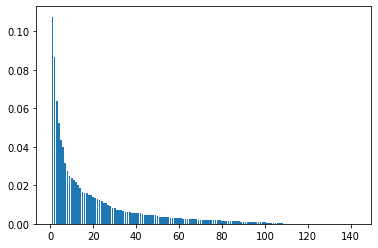

In [44]:
#Plotting barplot to visualize the variance explained by each of the PC
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

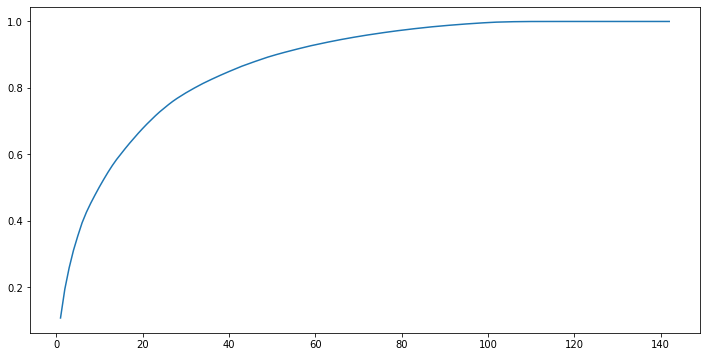

In [45]:
#Plotting a Scree plot

var_cumu = np.cumsum(pca.explained_variance_ratio_) #creating cumulative sum of explained_variance_ratio
plt.figure(figsize=(12,6))
plt.plot(range(1,len(var_cumu)+1), var_cumu) #plotting the cumulative sum

From the above scree plot, we can see that 60 Priciple components (PC) are abe to explain around 95% of the data. Therefore we will select 60 PC

In [46]:
#Performing PCA again of df_scaled but this time selecting only 60 components.
pca = PCA(n_components=60, random_state=100) #Initializing PCA into pca with n_components=60

In [47]:
#Fitting and transforming the data and storing it in newdata
newData = pca.fit_transform(df)

In [48]:
newData.shape

(29993, 60)

In [49]:
#Creating a dataframe with the transformed values and assigning names PC1, PC2,... to the 60 PCs
df_pca = pd.DataFrame(newData, columns=['PC'+str(i) for i in range(1,61)])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-3.316913,1.050984,1.392995,-11.021085,-7.901290,1.342445,0.722577,-0.022441,1.420320,-5.493968,-0.981513,-0.928250,-2.546622,-0.105388,-1.452980,-1.645297,1.972144,6.140588,2.582839,2.302594,-0.091472,0.501471,0.962877,0.120578,4.471099,-1.347898,-1.045124,0.303993,-0.193710,0.377220,0.347284,0.291389,-0.617958,0.746388,-0.262443,0.500324,0.825192,0.129268,-0.123911,0.357443,0.055685,-0.446260,-0.281344,0.121239,-0.996991,-0.868543,-1.006161,-0.279183,-0.709006,-0.035847,-0.145918,-0.533336,0.363081,0.192967,0.486149,-0.451268,0.196269,-0.303372,-0.242174,-0.296520
1,-1.536895,-1.790221,-1.755742,0.529394,0.522204,-0.502802,0.073627,-0.251742,0.187760,-1.412387,-0.707349,-0.253180,-0.968064,-0.062550,1.021657,0.162952,-0.534096,-0.877196,-0.358152,-0.229377,0.313464,-0.116733,0.477025,0.002944,0.369653,-0.085668,0.155429,0.297315,-0.134774,-0.198385,0.062490,-0.490687,0.187206,-0.003145,-0.304211,-1.001700,-0.118056,0.270390,0.662502,-1.020220,1.317318,-0.492195,0.871112,-0.389684,-0.209719,0.393996,0.111667,0.432465,-0.690675,0.435283,-0.206868,0.530238,-0.110967,-0.008653,0.227563,0.342745,0.485791,-0.267984,-0.309097,-0.115921
2,5.870951,4.422651,-1.864951,-3.639092,4.895864,0.279897,4.672232,5.087330,-0.706105,-1.844892,4.357237,-2.069638,0.631502,-0.953303,-1.656131,0.477801,-1.000286,2.439629,-1.658456,-1.407346,0.438634,-0.911679,-0.956426,1.836507,0.596336,0.808176,0.388558,-3.814487,1.286201,-3.893700,-0.644960,0.623238,-0.572981,1.086597,1.257570,-0.386124,-2.744419,-1.967350,0.162806,1.343343,-0.988929,1.012562,0.855242,1.042395,-2.328352,-1.806826,0.850443,0.688775,-1.038319,-0.547298,-0.121062,0.766623,0.558764,0.442634,-1.915547,1.815434,-0.433521,0.954832,1.450204,0.600109
3,-1.392810,-1.801783,0.376157,1.095389,-0.065408,-0.922272,-0.857237,0.340940,-0.568889,-0.711814,-0.791327,0.252424,-1.141702,0.411691,0.564877,0.563728,-0.110721,-1.529105,1.484673,-0.428435,-0.058898,-0.092470,-0.387299,-0.703200,0.373660,0.087697,-0.767119,-0.650933,0.590502,-0.567742,-0.076106,-0.212517,-0.494637,-0.550856,-0.371869,-0.777828,0.132183,-0.699292,0.705947,0.474601,0.414652,-1.043116,0.127516,0.076352,-0.522310,0.791525,0.153534,-0.030839,-0.723419,0.117391,-0.864261,-0.160275,-0.066950,-0.557972,-0.062127,0.409882,0.515574,-0.110828,-0.482805,-0.062099
4,3.177631,-3.797481,1.068407,0.556352,0.644480,0.627320,1.795102,-2.290758,-0.140399,0.429340,-0.493286,0.392240,-1.169282,0.232626,-0.469998,-0.018061,-0.337412,-0.530320,-0.043459,1.176021,0.015284,0.115158,0.631955,-0.781444,0.421718,0.444691,0.564583,-0.862688,1.176404,-1.176389,-0.108759,0.068359,-0.240920,0.070410,-0.281351,-0.338012,0.142069,-0.019488,-0.064649,0.180623,0.304305,0.003466,-0.342408,0.246215,0.052372,0.257434,0.009515,0.278035,0.364443,0.122561,-0.070094,0.240329,0.220640,-0.178781,0.240049,-0.191913,0.163311,-0.207926,-0.209680,-0.067538


#### Train-Test Split

In [50]:
X = df_pca
from sklearn.model_selection import train_test_split

#Splitting data into 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Creating Logistic Regression Model

In [51]:
#Importing LogisticRegression library and metrics library to measure the accuracy and other metrics.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print("Accuracy: {0} %".format(round(metrics.accuracy_score(y_test, y_pred)*100,2)))
print("Recall/Sensitivity: {0} %".format(round(metrics.recall_score(y_test, y_pred)*100,2)))

Accuracy: 93.93 %
Recall/Sensitivity: 35.84 %


1. We want to always predict when the high value customers are about to churn. Therefore for us, having high True positives and low false negatives is beneficial. Therefore having high recall/sensitivity is good.

2. In the above LogReg model, even though the accuracy is high, the recall values are low. It can be because our data is highly imbalanced. Therefore we can maybe balance the data and check.

In [53]:
X_train.shape

(20995, 60)

In [54]:
y_train.shape

(20995,)

In [55]:
#conda install -c conda-forge imbalanced-learn

In [56]:
from imblearn.over_sampling import SMOTE #Using SMOTE library to balance the data.
sm = SMOTE(random_state = 100) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [57]:
X_train_res.shape

(38628, 60)

In [58]:
y_train_res.shape

(38628,)

In [65]:
unique, count = np.unique(y_train_res, return_counts=True)
print("Frequency of 0 =", count[0])
print("Frequency of 1 =", count[1])

Frequency of 0 = 19314
Frequency of 1 = 19314


Therefore the data is balanced now

In [66]:
logreg = LogisticRegression(n_jobs=-1)
logreg.fit(X_train_res, y_train_res)

y_pred = logreg.predict(X_test)
print("Accuracy: {0} %".format(round(metrics.accuracy_score(y_test, y_pred)*100,2)))
print("Recall/Sensitivity: {0} %".format(round(metrics.recall_score(y_test, y_pred)*100,2)))

Accuracy: 84.76 %
Recall/Sensitivity: 76.33 %


Now we can see that the recall value has greatly increased.

Now let's try tinkering some hyperparameters to get even better results

In [67]:
# Storing the different values we want to check for various hyperparameters of LogReg in a dictionary params.
params = {'C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6, 1, 2], 'penalty':['l1', 'l2'], 'class_weight':['balanced',{0:0.4, 1:0.6} ]}
logmodel = LogisticRegression()
from sklearn.model_selection import GridSearchCV #Importing the GridSearchCV library
model = GridSearchCV(estimator = logmodel, cv = 5, param_grid = params, n_jobs = -1,scoring  = 'recall') #scoring is set to recall as we want to maximize recall
model.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 1, 2],
                         'class_weight': ['balanced', {0: 0.4, 1: 0.6}],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='re

In [68]:
model.best_params_ #Prints the best values possible for hyperparameters to have the best recall possible.

{'C': 0.0001, 'class_weight': {0: 0.4, 1: 0.6}, 'penalty': 'l2'}

In [69]:
# Generating a new LogReg model with the above hypermeter values.
logreg = LogisticRegression(penalty = 'l2', C= 0.0001, class_weight  = {0: 0.4, 1: 0.6})
logreg.fit(X_train_res, y_train_res)

y_pred = logreg.predict(X_test)
print("Accuracy: {0} %".format(round(metrics.accuracy_score(y_test, y_pred)*100,2)))
print("Recall/Sensitivity: {0} %".format(round(metrics.recall_score(y_test, y_pred)*100,2)))

Accuracy: 64.71 %
Recall/Sensitivity: 87.82 %


As you can see that even though accuracy has taken a hit, recall value has greatly increased. And in our business, we want to focus more on recall than accuracy. Therefore we will stop with LogReg model here.

Let's try and see if we can get better results with someother type of machine learning model. Let's try Random Forest.

# Random Forest

As random forest doesn't need scaling, we will use the initial dataframe values.

In [70]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: churn, dtype: float64

#### Test Train Split

In [71]:
X = init_df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

As we have a huge class imbalance, let's use SMOTE again to have better quality data for our model.

In [72]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 100) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_res, y_train_res)
y_pred = rf_model.predict(X_test)
print("Accuracy: {0} %".format(round(metrics.accuracy_score(y_test, y_pred)*100,2)))
print("Recall/Sensitivity: {0} %".format(round(metrics.recall_score(y_test, y_pred)*100,2)))

Accuracy: 93.37 %
Recall/Sensitivity: 55.54 %


Again, we have good accuracy from our RF model but the recall score is extremely low. Let's tune some hyperparameters to get as high value for recall as possible.

After trying many possible values for all kinds of hyperparameters, I found these values to be ideal for our RF model which maximizes the recall.

In [81]:
# {'class_weight': {0:0.15, 1: 0.85}, 'criterion': 'entropy', 'min_samples_leaf': 80, 'min_samples_split': 10, 'n_estimators': 100}
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight = {0:0.15, 1: 0.85}, criterion = 'entropy', min_samples_leaf=80,
                                  min_samples_split=10, n_estimators=100, n_jobs=-1)
rf_model.fit(X_train_res, y_train_res)
y_pred = rf_model.predict(X_test)
print("Accuracy: {0} %".format(round(metrics.accuracy_score(y_test, y_pred)*100,2)))
print("Recall/Sensitivity: {0} %".format(round(metrics.recall_score(y_test, y_pred)*100,2)))

Accuracy: 80.48 %
Recall/Sensitivity: 85.36 %


Therefore, the recall value is high without compromising much on accuracy of the model.

In [82]:
dic = {}
for feature in zip(init_df.columns, rf_model.feature_importances_):
    dic[feature[0]] = feature[1]
dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

for i in dic:
    print(i,':',dic[i])

roam_og_mou_8 : 0.1221491386857089
roam_ic_mou_8 : 0.10181642046214932
rech_data_done_8 : 0.07029306137160873
total_ic_mou_8 : 0.05374855642550729
total_rech_data_8 : 0.038638372293640214
av_rech_amt_data_8 : 0.036355510541212215
total_rech_amt_8 : 0.030685300516109463
max_rech_data_8 : 0.030370446508743525
last_day_rch_amt_8 : 0.027058489400877087
og_others_8 : 0.02331354168564204
arpu_8 : 0.021025670143099622
loc_ic_mou_8 : 0.019309012193580243
loc_ic_t2m_mou_8 : 0.01888235888064343
max_rech_amt_8 : 0.01822055050268992
total_og_mou_8 : 0.017385354225941924
isd_og_mou_8 : 0.016954602217606952
ic_others_8 : 0.016692021938588812
roam_og_mou_7 : 0.016505668222074225
spl_ic_mou_8 : 0.015850906497434265
isd_ic_mou_8 : 0.015026973419970406
roam_ic_mou_7 : 0.01073838677761488
total_rech_num_8 : 0.010258621029417658
loc_og_mou_8 : 0.010227888766129772
monthly_2g_8 : 0.009590994770798415
sachet_2g_8 : 0.00860558876658861
vol_3g_mb_8 : 0.008413773346193502
loc_og_t2m_mou_8 : 0.00815807636008185

In [89]:
df

array([[-0.66757292, -0.61588188, -0.51148446, ..., -0.15330245,
        -0.28208882, -0.34966109],
       [-1.00969372, -0.33269936, -0.40436801, ..., -0.47566904,
        -0.07742503, -0.44528419],
       [ 1.15845169,  1.6757649 ,  5.29973109, ..., -0.47566904,
        -0.52768538, -0.35109364],
       ...,
       [-0.42633647, -0.01398223, -0.14155961, ..., -0.47566904,
         0.07266176, -0.27731702],
       [-0.40448395, -0.43705803,  0.2607057 , ...,  0.08367537,
        -0.06248132, -0.07353595],
       [ 0.35808991, -1.04959787, -0.93156255, ..., -0.22941678,
        -0.52768538, -0.51046548]])

In [ ]:
df_col = ['roam_og_mou_8','roam_ic_mou_8','rech_data_done_8','total_ic_mou_8','total_rech_data_8','av_rech_amt_data_8',
          'total_rech_amt_8','max_rech_data_8','last_day_rch_amt_8','og_others_8']
plt.figure(figsize=(20,40))
for i in range(1,len(df_col)+1):
    plt.subplot(5,2,i)
    sns.countplot(x=y, y = init_df[df_col[i-1]])

The top 5 predictors which predict the churning customers are,
1. roam_ic_8 or roam_og_8 - If a customer's network is under "Roaming", the customer is very likely to undergo churning. We can either provide offers for customers who are under roaming or we can altogether remove the extra roaming charges for our high value customers.
2. rech_data_done_8 - This indicates whether a customer has done data recharge in 8th month (August). This is a good indicator to predict the churn of a customer. Therefore if a customer has not done his data recharge present month, he is likely to churn. You can provide him with some offers or extra data to retain him.
3. total_ic_mou_8 - If the number of minutes of incoming calls are decreasing this month, then the customer is likely to churn. We can provide him with better offers on incoming calls or on calls in general
4. a. total_rech_data_8 - This indicates the total rech the customer has done for data in august. If it is lowwer than usual, or the customer hasn't done any data recharge at all, then he is likely to churn. Therefore we can offer him some offers for data recharge or maybe throw some freebies for a couple of days
4. b. av_rech_amt_data_8 - This indicates that the average of the data recharge amount done by the customer in august. If the average goes down, he is likely to churn.
5.